
Etapa 1: Exploração de Dados

Amostra dos dados:
   temperatura  ruido  total_pessoas  pessoas_atendidas  media_estresse
0         21.5     35             53                 42             1.8
1         30.2     60             85                 25             2.9
2         26.7     45             66                 40             2.1
3         34.1     85             90                 15             4.2
4         28.9     72             78                 20             3.5


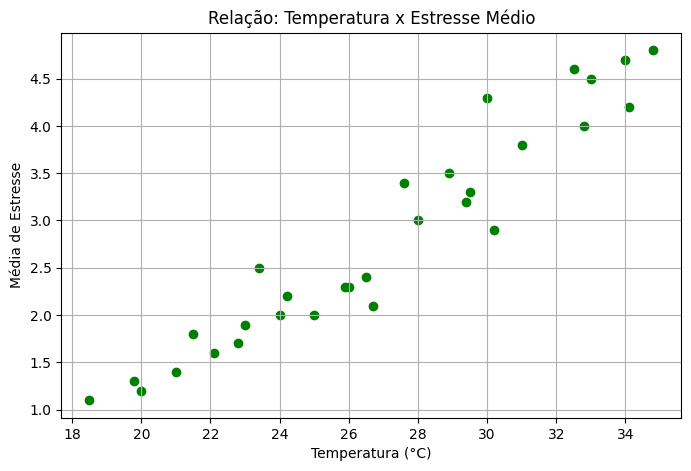


Etapa 2: Levantamento de Hipótese
Hipótese: A temperatura e o ruído estão positivamente associados ao estresse médio, enquanto o número de pessoas atendidas pode ajudar a reduzi-lo.

Etapa 3: Criação e Treinamento do Modelo
Modelo treinado (R²: 0.90)

Etapa 4: Validações e Conclusões
Modelo e scaler salvos!

Conclusão:
O modelo está com bom desempenho (R² = 0.90). Ele pode ser usado para prever o estresse em abrigos.

Agora, digite os dados reais do abrigo:

Nível médio de estresse previsto no abrigo: 3.55

Contribuição real de cada variável para o nível de estresse:
total_pessoas: 0.38
temperatura: 0.23
pessoas_atendidas: 0.16
ruido: 0.03


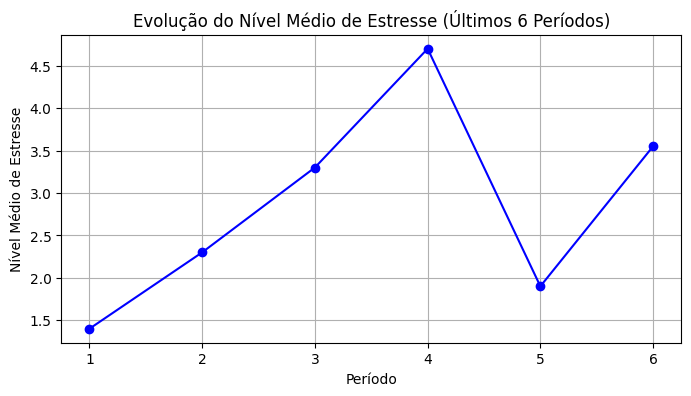


Script finalizado com todas as etapas do desenvolvimento!


In [ ]:
#pip install pandas scikit-learn joblib shap matplotlib openpyxl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib
import shap


print('\nEtapa 1: Exploração de Dados')

df = pd.read_excel('dados_abrigo.xlsx')

print('\nAmostra dos dados:')
print(df.head())

plt.figure(figsize=(8, 5))
plt.scatter(df['temperatura'], df['media_estresse'], color='green')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Média de Estresse')
plt.title('Relação: Temperatura x Estresse Médio')
plt.grid(True)
plt.show()

print('\nEtapa 2: Levantamento de Hipótese')
print('Hipótese: A temperatura e o ruído estão positivamente associados ao estresse médio, enquanto o número de pessoas atendidas pode ajudar a reduzi-lo.')

print('\nEtapa 3: Criação e Treinamento do Modelo')

X = df[['temperatura', 'ruido', 'total_pessoas', 'pessoas_atendidas']]
y = df['media_estresse']

scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_normalizado, y, test_size=0.2, random_state=42)

modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

r2 = modelo.score(X_test, y_test)
print(f'Modelo treinado (R²: {r2:.2f})')

print('\nEtapa 4: Validações e Conclusões')

joblib.dump(scaler, 'scaler_refugio.pkl')
joblib.dump(modelo, 'modelo_estresse_refugio.pkl')
print('Modelo e scaler salvos!')

print('\nConclusão:')
if r2 > 0.7:
    print(f'O modelo está com bom desempenho (R² = {r2:.2f}). Ele pode ser usado para prever o estresse em abrigos.')
else:
    print(f'O modelo ainda não está ideal (R² = {r2:.2f}). Considere coletar mais dados ou ajustar hiperparâmetros.')

print('\nAgora, digite os dados reais do abrigo:')
temperatura = float(input('Temperatura atual (°C): '))
ruido = float(input('Nível de ruído (dB): '))
total_pessoas = int(input('Total de pessoas no abrigo: '))
pessoas_atendidas = int(input('Número de pessoas sendo atendidas: '))

entrada_df = pd.DataFrame([{
    'temperatura': temperatura,
    'ruido': ruido,
    'total_pessoas': total_pessoas,
    'pessoas_atendidas': pessoas_atendidas
}])

entrada_normalizada = scaler.transform(entrada_df)
media_estresse_predita = modelo.predict(entrada_normalizada)[0]
media_estresse_predita = round(max(1, min(media_estresse_predita, 5)), 2)

print(f'\nNível médio de estresse previsto no abrigo: {media_estresse_predita}')

explainer = shap.Explainer(modelo, X_normalizado, feature_names=X.columns)
shap_values = explainer(entrada_normalizada)

valores_shap = shap_values.values[0]
nomes_variaveis = ['temperatura', 'ruido', 'total_pessoas', 'pessoas_atendidas']

df_shap = pd.DataFrame({
    'variavel': nomes_variaveis,
    'contribuicao': valores_shap
}).sort_values(by='contribuicao', ascending=False)

print('\nContribuição real de cada variável para o nível de estresse:')
for idx, row in df_shap.iterrows():
    print(f'{row["variavel"]}: {row["contribuicao"]:.2f}')

ultimos_5_niveis = df['media_estresse'].tail(5).tolist()
niveis_estresse = ultimos_5_niveis + [media_estresse_predita]

plt.figure(figsize=(8, 4))
plt.plot(range(1, 7), niveis_estresse, marker='o', linestyle='-', color='blue')
plt.title('Evolução do Nível Médio de Estresse (Últimos 6 Períodos)')
plt.xlabel('Período')
plt.ylabel('Nível Médio de Estresse')
plt.xticks(range(1, 7))
plt.grid(True)
plt.show()

print('\nScript finalizado com todas as etapas do desenvolvimento!')
